# Data Preparation

In [1]:
import used_car_prediction_lib.data_read.reader as rd

reader = rd.CSVReader()
df = reader.read('car_price.csv')
df.head()

,Unnamed: 0,car_name,car_prices_in_rupee,kms_driven,fuel_type,transmission,ownership,manufacture,engine,Seats
0,0,Jeep Compass 2.0 Longitude Option BSIV,10.03 Lakh,"86,226 kms",Diesel,Manual,1st Owner,2017,1956 cc,5 Seats
1,1,Renault Duster RXZ Turbo CVT,12.83 Lakh,"13,248 kms",Petrol,Automatic,1st Owner,2021,1330 cc,5 Seats
2,2,Toyota Camry 2.5 G,16.40 Lakh,"60,343 kms",Petrol,Automatic,1st Owner,2016,2494 cc,5 Seats
3,3,Honda Jazz VX CVT,7.77 Lakh,"26,696 kms",Petrol,Automatic,1st Owner,2018,1199 cc,5 Seats
4,4,Volkswagen Polo 1.2 MPI Highline,5.15 Lakh,"69,414 kms",Petrol,Manual,1st Owner,2016,1199 cc,5 Seats


# Data Cleaning

In [2]:
import used_car_prediction_lib.data_process.deleteProcessor  as dp

#example
dropProcessor = dp.DropDeleteProcessor()
df = dropProcessor.delete(df, ['Unnamed: 0'])
df.head()

,car_name,car_prices_in_rupee,kms_driven,fuel_type,transmission,ownership,manufacture,engine,Seats
0,Jeep Compass 2.0 Longitude Option BSIV,10.03 Lakh,"86,226 kms",Diesel,Manual,1st Owner,2017,1956 cc,5 Seats
1,Renault Duster RXZ Turbo CVT,12.83 Lakh,"13,248 kms",Petrol,Automatic,1st Owner,2021,1330 cc,5 Seats
2,Toyota Camry 2.5 G,16.40 Lakh,"60,343 kms",Petrol,Automatic,1st Owner,2016,2494 cc,5 Seats
3,Honda Jazz VX CVT,7.77 Lakh,"26,696 kms",Petrol,Automatic,1st Owner,2018,1199 cc,5 Seats
4,Volkswagen Polo 1.2 MPI Highline,5.15 Lakh,"69,414 kms",Petrol,Manual,1st Owner,2016,1199 cc,5 Seats


In [3]:
import used_car_prediction_lib.data_exploration.dataExplorer as dataExp

detectMissingValue_dataExp = dataExp.MissingValuesDataExplorer()
#example
detectMissingValue_dataExp.check(df)

car_name               0
car_prices_in_rupee    0
kms_driven             0
fuel_type              0
transmission           0
ownership              0
manufacture            0
engine                 0
Seats                  0
dtype: int64

In [4]:
import used_car_prediction_lib.features.convertor as cnvrt
# Apply the conversion function to the 'price' column
priceUnit_cnvrt = cnvrt.PriceUnitConvertor()
df['car_prices_in_rupee'] = df['car_prices_in_rupee'].apply(priceUnit_cnvrt .convert_comma_to_dot)
df['car_prices_in_rupee'] = df['car_prices_in_rupee'].apply(priceUnit_cnvrt.convert_price)

# Apply the conversion function to the 'kms_driven' column
string_cnvrt = cnvrt.StringConvertor()
df['kms_driven'] = df['kms_driven'].apply(string_cnvrt.convert_kms)

# Apply the conversion function to the 'engine' column
df['engine'] = df['engine'].apply(string_cnvrt.convert_engine)

# Apply the conversion function to the 'seats' column
df['Seats'] = df['Seats'].apply(string_cnvrt.convert_seats)

# Keep the first word of the column car
df['car_name'] = df['car_name'].apply(string_cnvrt.keep_first_word)


ownerShip_cnvrt = cnvrt.OwnershipConvertor()
# Call the preprocess_data function to handle the ownership column
df = ownerShip_cnvrt.process_ownership(df)

# Display the modified DataFrame
df.head(20)

#example
#detect_missing_values(df)
        

,car_name,car_prices_in_rupee,kms_driven,fuel_type,transmission,manufacture,engine,Seats,num_owners
0,Jeep,1003000.0,86226,Diesel,Manual,2017,1956.0,5,1
1,Renault,1283000.0,13248,Petrol,Automatic,2021,1330.0,5,1
2,Toyota,1640000.0,60343,Petrol,Automatic,2016,2494.0,5,1
3,Honda,777000.0,26696,Petrol,Automatic,2018,1199.0,5,1
4,Volkswagen,515000.0,69414,Petrol,Manual,2016,1199.0,5,1
5,Volkswagen,766000.0,49719,Petrol,Automatic,2017,1197.0,5,1
6,Volkswagen,758000.0,43688,Petrol,Automatic,2017,1197.0,5,1
7,Honda,1160000.0,14470,Diesel,Manual,2021,1498.0,5,1
8,Honda,699000.0,21429,Petrol,Automatic,2015,1497.0,5,1
9,Renault,753000.0,31750,Petrol,Automatic,2017,1498.0,5,1


In [5]:
detectMissingValue_dataExp.check(df)

car_name               0
car_prices_in_rupee    0
kms_driven             0
fuel_type              0
transmission           0
manufacture            0
engine                 0
Seats                  0
num_owners             0
dtype: int64

In [6]:
import used_car_prediction_lib.features.encoder as ecod

binary_ecod = ecod.BinaryEncoder(true_value='Automatic', false_value='Manual')
df = binary_ecod.encode(df, ['transmission'])

df.head(20)

,car_name,car_prices_in_rupee,kms_driven,fuel_type,transmission,manufacture,engine,Seats,num_owners
0,Jeep,1003000.0,86226,Diesel,0,2017,1956.0,5,1
1,Renault,1283000.0,13248,Petrol,1,2021,1330.0,5,1
2,Toyota,1640000.0,60343,Petrol,1,2016,2494.0,5,1
3,Honda,777000.0,26696,Petrol,1,2018,1199.0,5,1
4,Volkswagen,515000.0,69414,Petrol,0,2016,1199.0,5,1
5,Volkswagen,766000.0,49719,Petrol,1,2017,1197.0,5,1
6,Volkswagen,758000.0,43688,Petrol,1,2017,1197.0,5,1
7,Honda,1160000.0,14470,Diesel,0,2021,1498.0,5,1
8,Honda,699000.0,21429,Petrol,1,2015,1497.0,5,1
9,Renault,753000.0,31750,Petrol,1,2017,1498.0,5,1


In [7]:
detectMissingValue_dataExp.check(df)

car_name               0
car_prices_in_rupee    0
kms_driven             0
fuel_type              0
transmission           0
manufacture            0
engine                 0
Seats                  0
num_owners             0
dtype: int64

In [8]:
import used_car_prediction_lib.features.encoder as ecod

oneHot_ecod = ecod.OneHotEncoder()

# Define the columns to one-hot encode
columns_to_encode = ['fuel_type', 'car_name']

# Apply the one_hot_encode function
df = oneHot_ecod.encode(df, columns_to_encode)

df.head(20)  # Display the first 20 rows of the encoded DataFrame

,car_prices_in_rupee,kms_driven,transmission,manufacture,engine,Seats,num_owners,fuel_type_Diesel,fuel_type_Electric,fuel_type_Lpg,...,car_name_Mitsubishi,car_name_Nissan,car_name_Porsche,car_name_Premier,car_name_Renault,car_name_Skoda,car_name_Tata,car_name_Toyota,car_name_Volkswagen,car_name_Volvo
0,1003000.0,86226,0,2017,1956.0,5,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1283000.0,13248,1,2021,1330.0,5,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,1640000.0,60343,1,2016,2494.0,5,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,777000.0,26696,1,2018,1199.0,5,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,515000.0,69414,0,2016,1199.0,5,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
5,766000.0,49719,1,2017,1197.0,5,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
6,758000.0,43688,1,2017,1197.0,5,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
7,1160000.0,14470,0,2021,1498.0,5,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
8,699000.0,21429,1,2015,1497.0,5,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,753000.0,31750,1,2017,1498.0,5,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [9]:
detectMissingValue_dataExp.check(df)

car_prices_in_rupee       0
kms_driven                0
transmission              0
manufacture               0
engine                    0
Seats                     0
num_owners                0
fuel_type_Diesel          0
fuel_type_Electric        0
fuel_type_Lpg             0
fuel_type_Petrol          0
car_name_BMW              0
car_name_Bentley          0
car_name_Chevrolet        0
car_name_Datsun           0
car_name_Fiat             0
car_name_Force            0
car_name_Ford             0
car_name_Honda            0
car_name_Hyundai          0
car_name_Isuzu            0
car_name_Jaguar           0
car_name_Jeep             0
car_name_Kia              0
car_name_Land             0
car_name_Lexus            0
car_name_MG               0
car_name_Mahindra         0
car_name_Maruti           0
car_name_Maserati         0
car_name_Mercedes-Benz    0
car_name_Mini             0
car_name_Mitsubishi       0
car_name_Nissan           0
car_name_Porsche          0
car_name_Premier    

In [10]:
'''
import used_car_prediction_lib.data_process.fillProcessor as fi_prc

mean_fi_prc = fi_prc.MeanFillProcessor()
mean_fi_prc.fill(df,['colmn'])
mean_fi_prc.fill(df,'colmn')

distrbuted_fi_prc = fi_prc.DistributionFillProcessor()
distrbuted_fi_prc.fill(df,['colmn'])

knn_fi_prc = fi_prc.KNNFillProcessor()
knn_fi_prc.fill(df,['colmn'])
knn_fi_prc.handle_outliers_KNN(df,'colmn')
df.head()'''

"\nimport used_car_prediction_lib.data_process.fillProcessor as fi_prc\n\nmean_fi_prc = fi_prc.MeanFillProcessor()\nmean_fi_prc.fill(df,['colmn'])\nmean_fi_prc.fill(df,'colmn')\n\ndistrbuted_fi_prc = fi_prc.DistributionFillProcessor()\ndistrbuted_fi_prc.fill(df,['colmn'])\n\nknn_fi_prc = fi_prc.KNNFillProcessor()\nknn_fi_prc.fill(df,['colmn'])\nknn_fi_prc.handle_outliers_KNN(df,'colmn')\ndf.head()"

# Data Exploration (graph (correlation and density), outliers, normality test,...)

In [11]:
# Class to check outliers using quantiles

import used_car_prediction_lib.data_exploration.dataExplorer as dexp

# Example
outlier_dexp = dexp.OutliersDataExplorer()
outlier_dexp.check(df)

Outliers in each numeric column based on quantiles method:
Column 'car_prices_in_rupee': 132 outliers
Column 'kms_driven': 22 outliers
Column 'transmission': 0 outliers
Column 'manufacture': 0 outliers
Column 'engine': 41 outliers
Column 'Seats': 0 outliers
Column 'num_owners': 96 outliers
Column 'fuel_type_Diesel': 0 outliers
Column 'fuel_type_Electric': 14 outliers
Column 'fuel_type_Lpg': 28 outliers
Column 'fuel_type_Petrol': 0 outliers
Column 'car_name_BMW': 172 outliers
Column 'car_name_Bentley': 1 outliers
Column 'car_name_Chevrolet': 82 outliers
Column 'car_name_Datsun': 25 outliers
Column 'car_name_Fiat': 17 outliers
Column 'car_name_Force': 1 outliers
Column 'car_name_Ford': 168 outliers
Column 'car_name_Honda': 498 outliers
Column 'car_name_Hyundai': 0 outliers
Column 'car_name_Isuzu': 4 outliers
Column 'car_name_Jaguar': 30 outliers
Column 'car_name_Jeep': 49 outliers
Column 'car_name_Kia': 61 outliers
Column 'car_name_Land': 50 outliers
Column 'car_name_Lexus': 10 outliers


{'car_prices_in_rupee': 132,
 'kms_driven': 22,
 'transmission': 0,
 'manufacture': 0,
 'engine': 41,
 'Seats': 0,
 'num_owners': 96,
 'fuel_type_Diesel': 0,
 'fuel_type_Electric': 14,
 'fuel_type_Lpg': 28,
 'fuel_type_Petrol': 0,
 'car_name_BMW': 172,
 'car_name_Bentley': 1,
 'car_name_Chevrolet': 82,
 'car_name_Datsun': 25,
 'car_name_Fiat': 17,
 'car_name_Force': 1,
 'car_name_Ford': 168,
 'car_name_Honda': 498,
 'car_name_Hyundai': 0,
 'car_name_Isuzu': 4,
 'car_name_Jaguar': 30,
 'car_name_Jeep': 49,
 'car_name_Kia': 61,
 'car_name_Land': 50,
 'car_name_Lexus': 10,
 'car_name_MG': 62,
 'car_name_Mahindra': 315,
 'car_name_Maruti': 0,
 'car_name_Maserati': 5,
 'car_name_Mercedes-Benz': 283,
 'car_name_Mini': 14,
 'car_name_Mitsubishi': 8,
 'car_name_Nissan': 63,
 'car_name_Porsche': 10,
 'car_name_Premier': 1,
 'car_name_Renault': 170,
 'car_name_Skoda': 113,
 'car_name_Tata': 269,
 'car_name_Toyota': 263,
 'car_name_Volkswagen': 159,
 'car_name_Volvo': 31}

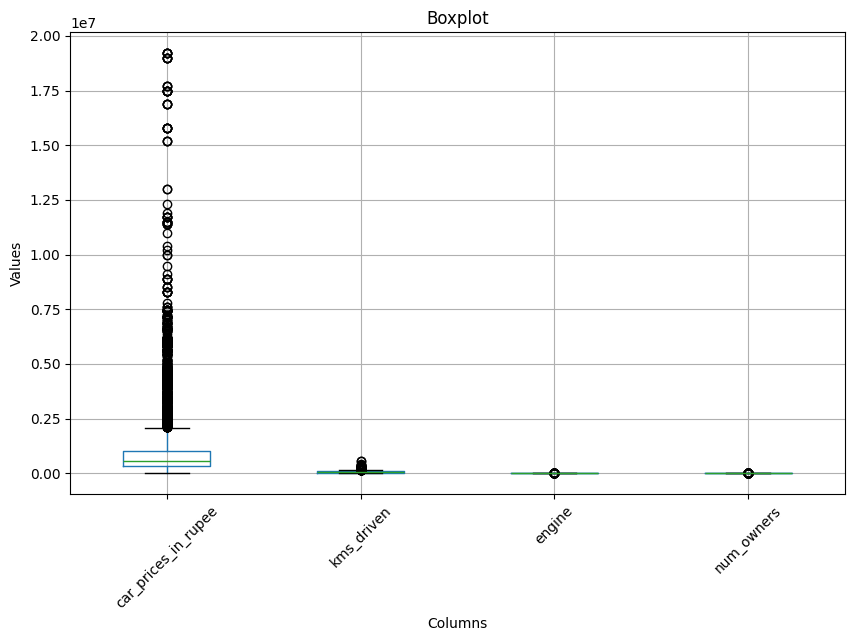

In [12]:
# Assuming 'df' is your DataFrame and 'selected_columns' is the list of columns to plot
import used_car_prediction_lib.data_exploration.graphicsExplorer as grpExp
boxplot_grpExp = grpExp.BoxPlotsGraphicsExplorer()
boxplot_grpExp.plot(df, ['car_prices_in_rupee', 'kms_driven', 'engine', 'num_owners'])

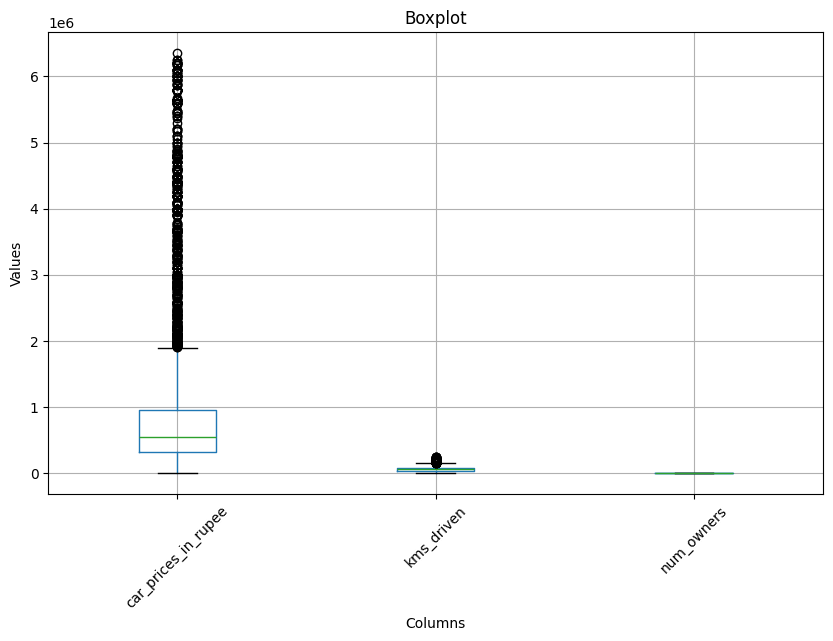

In [13]:
#example
import used_car_prediction_lib.data_process.fillProcessor as fillPrc
mean_fillPrc = fillPrc.MeanFillProcessor()
df = mean_fillPrc.handle_outliers_mean(df, 'car_prices_in_rupee')
df = mean_fillPrc.handle_outliers_mean(df, 'kms_driven')
df = mean_fillPrc.handle_outliers_mean(df, 'num_owners')

import used_car_prediction_lib.data_exploration.graphicsExplorer as grpExp
boxplot_grpExp = grpExp.BoxPlotsGraphicsExplorer()
boxplot_grpExp.plot(df, ['car_prices_in_rupee', 'kms_driven', 'num_owners'])

In [14]:
# Example 
import used_car_prediction_lib.data_exploration.dataExplorer as dataExp
range_dataExp = dataExp.RangeDataExplorer()
ranges = range_dataExp.check(df)
df.head()

car_prices_in_rupee: Min = 35.0, Max = 6350000.0
kms_driven: Min = 250.0, Max = 249535.0
transmission: Min = 0, Max = 1
manufacture: Min = 1995, Max = 2022
engine: Min = 0.0, Max = 5950.0
Seats: Min = 2, Max = 8
num_owners: Min = 0.0, Max = 3.0
fuel_type_Diesel: Min = 0, Max = 1
fuel_type_Electric: Min = 0, Max = 1
fuel_type_Lpg: Min = 0, Max = 1
fuel_type_Petrol: Min = 0, Max = 1
car_name_BMW: Min = 0, Max = 1
car_name_Bentley: Min = 0, Max = 1
car_name_Chevrolet: Min = 0, Max = 1
car_name_Datsun: Min = 0, Max = 1
car_name_Fiat: Min = 0, Max = 1
car_name_Force: Min = 0, Max = 1
car_name_Ford: Min = 0, Max = 1
car_name_Honda: Min = 0, Max = 1
car_name_Hyundai: Min = 0, Max = 1
car_name_Isuzu: Min = 0, Max = 1
car_name_Jaguar: Min = 0, Max = 1
car_name_Jeep: Min = 0, Max = 1
car_name_Kia: Min = 0, Max = 1
car_name_Land: Min = 0, Max = 1
car_name_Lexus: Min = 0, Max = 1
car_name_MG: Min = 0, Max = 1
car_name_Mahindra: Min = 0, Max = 1
car_name_Maruti: Min = 0, Max = 1
car_name_Maserati: 

,car_prices_in_rupee,kms_driven,transmission,manufacture,engine,Seats,num_owners,fuel_type_Diesel,fuel_type_Electric,fuel_type_Lpg,...,car_name_Mitsubishi,car_name_Nissan,car_name_Porsche,car_name_Premier,car_name_Renault,car_name_Skoda,car_name_Tata,car_name_Toyota,car_name_Volkswagen,car_name_Volvo
0,1003000.0,86226.0,0,2017,1956.0,5,1.0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1283000.0,13248.0,1,2021,1330.0,5,1.0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,1640000.0,60343.0,1,2016,2494.0,5,1.0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,777000.0,26696.0,1,2018,1199.0,5,1.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,515000.0,69414.0,0,2016,1199.0,5,1.0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [15]:
# Usage example
import used_car_prediction_lib.data_exploration.dataExplorer as dataExp
#p-value = 0.05
normality_dataExp = dataExp.NormalityDataExplorer(alpha=0.05)
normality_dataExp.check(df['car_prices_in_rupee'], 'car_prices_in_rupee')
normality_dataExp.check(df['kms_driven'], 'kms_driven')
normality_dataExp.check(df['engine'], 'engine')
normality_dataExp.check(df['manufacture'], 'manufacture')


Column "car_prices_in_rupee": Statistics=0.656, p=0.000. Column "car_prices_in_rupee" is not normally distributed (reject H0)
Column "kms_driven": Statistics=0.954, p=0.000. Column "kms_driven" is not normally distributed (reject H0)
Column "engine": Statistics=0.850, p=0.000. Column "engine" is not normally distributed (reject H0)
Column "manufacture": Statistics=0.965, p=0.000. Column "manufacture" is not normally distributed (reject H0)


/Users/mathieu26/anaconda3/envs/computing_final/lib/python3.11/site-packages/scipy/stats/_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


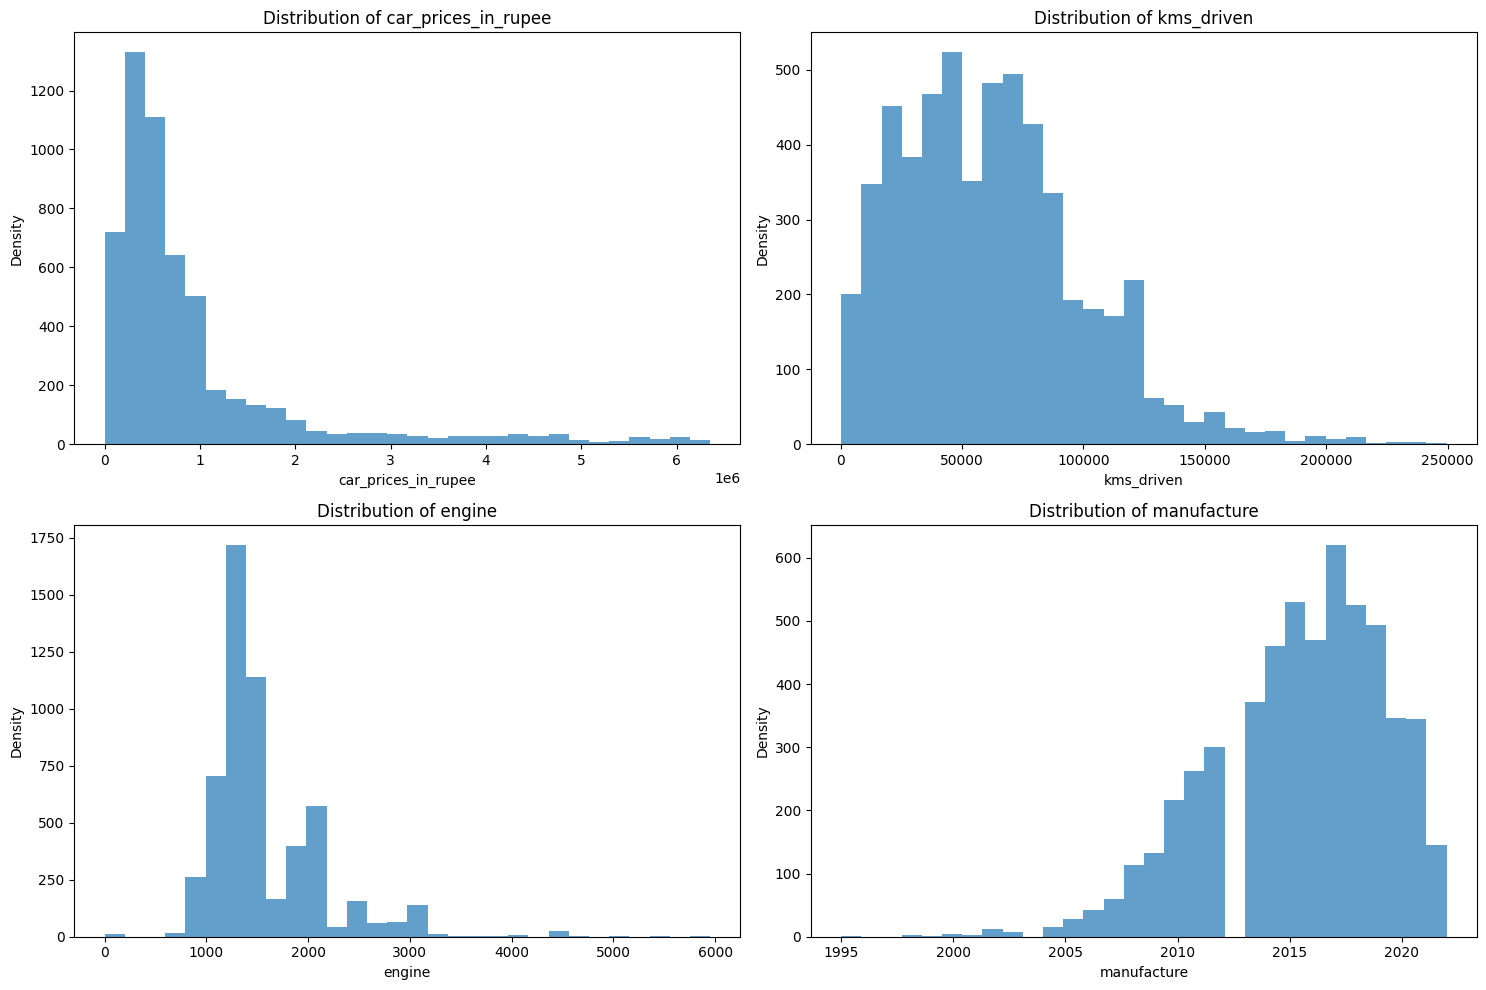

In [16]:
# Usage example
import used_car_prediction_lib.data_exploration.graphicsExplorer as grpExp
distributionPlot_grpExp = grpExp.DistributionGraphicsExplorer()
distributionPlot_grpExp.plot(df, ['car_prices_in_rupee', 'kms_driven', 'engine','manufacture'])

# Data Transformation - features application

In [17]:
'''
#example transforamtions
import used_car_prediction_lib.features.transformator as trsfrm

#define class: transformator
normalization_trsfrm = trsfrm.normalization_Transformator()
standardization_trsfrm = trsfrm.standardization_Transformator()
log_trsfrm = trsfrm.Log_Transformator()
square_trsfrm = trsfrm.Square_Transformator()
square_trsfrm.transform(df,'example')

df = log_trsfrm.transform(df, 'car_prices_in_rupee')
df = log_trsfrm.transform(df, 'kms_driven')


df = normalization_trsfrm.transform(df, 'engine')
df = standardization_trsfrm.transform(df, 'engine')

df = normalization_trsfrm.transform(df, 'manufacture')
df = standardization_trsfrm.transform(df, 'manufacture')
'''

# Usage example
import used_car_prediction_lib.data_exploration.dataExplorer as dataExp
normality_dataExp = dataExp.NormalityDataExplorer(alpha=0.05)
normality_dataExp.check(df['car_prices_in_rupee'], 'car_prices_in_rupee')
normality_dataExp.check(df['kms_driven'], 'kms_driven')
#normality_dataExp.check(df['engine'], 'engine')
#normality_dataExp.check(df['manufacture'], 'manufacture')


Column "car_prices_in_rupee": Statistics=0.656, p=0.000. Column "car_prices_in_rupee" is not normally distributed (reject H0)
Column "kms_driven": Statistics=0.954, p=0.000. Column "kms_driven" is not normally distributed (reject H0)


In [18]:
detectMissingValue_dataExp.check(df)

car_prices_in_rupee       0
kms_driven                0
transmission              0
manufacture               0
engine                    0
Seats                     0
num_owners                0
fuel_type_Diesel          0
fuel_type_Electric        0
fuel_type_Lpg             0
fuel_type_Petrol          0
car_name_BMW              0
car_name_Bentley          0
car_name_Chevrolet        0
car_name_Datsun           0
car_name_Fiat             0
car_name_Force            0
car_name_Ford             0
car_name_Honda            0
car_name_Hyundai          0
car_name_Isuzu            0
car_name_Jaguar           0
car_name_Jeep             0
car_name_Kia              0
car_name_Land             0
car_name_Lexus            0
car_name_MG               0
car_name_Mahindra         0
car_name_Maruti           0
car_name_Maserati         0
car_name_Mercedes-Benz    0
car_name_Mini             0
car_name_Mitsubishi       0
car_name_Nissan           0
car_name_Porsche          0
car_name_Premier    

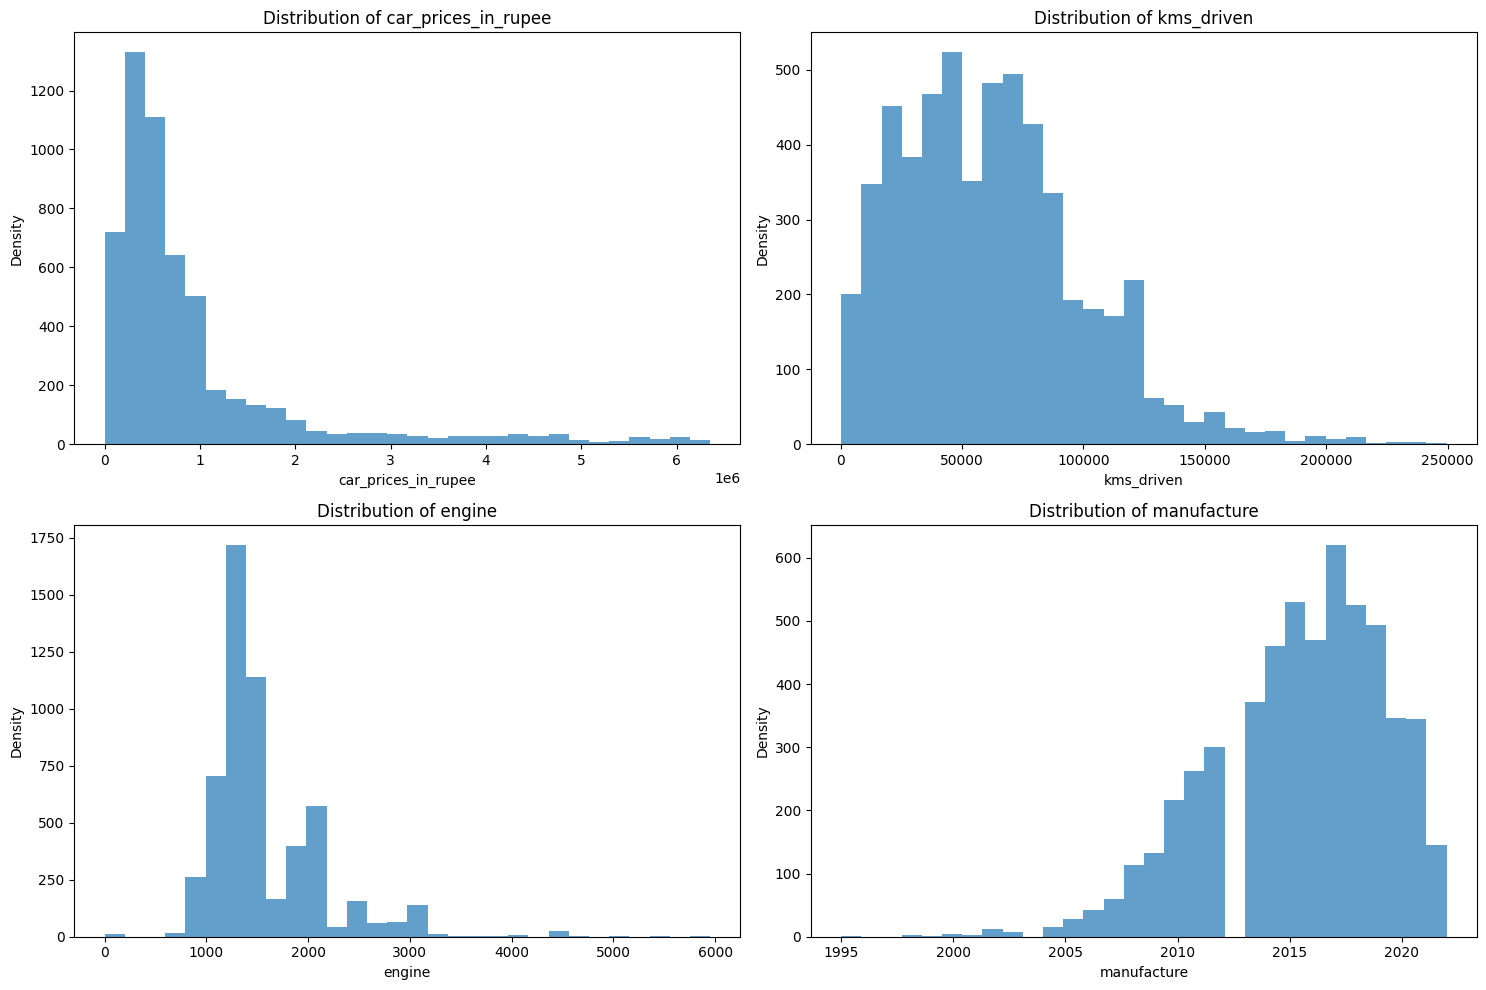

,car_prices_in_rupee,kms_driven,transmission,manufacture,engine,Seats,num_owners,fuel_type_Diesel,fuel_type_Electric,fuel_type_Lpg,...,car_name_Mitsubishi,car_name_Nissan,car_name_Porsche,car_name_Premier,car_name_Renault,car_name_Skoda,car_name_Tata,car_name_Toyota,car_name_Volkswagen,car_name_Volvo
0,1003000.0,86226.0,0,2017,1956.0,5,1.0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1283000.0,13248.0,1,2021,1330.0,5,1.0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,1640000.0,60343.0,1,2016,2494.0,5,1.0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,777000.0,26696.0,1,2018,1199.0,5,1.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,515000.0,69414.0,0,2016,1199.0,5,1.0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [19]:
distributionPlot_grpExp.plot(df, ['car_prices_in_rupee', 'kms_driven', 'engine','manufacture'])
df.head()

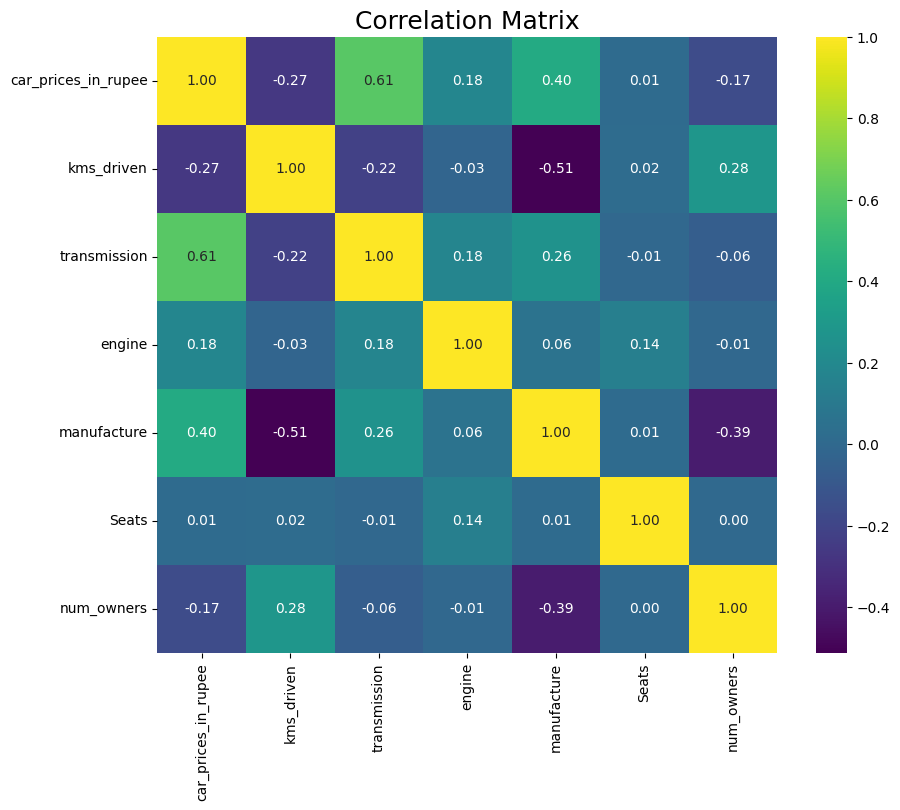

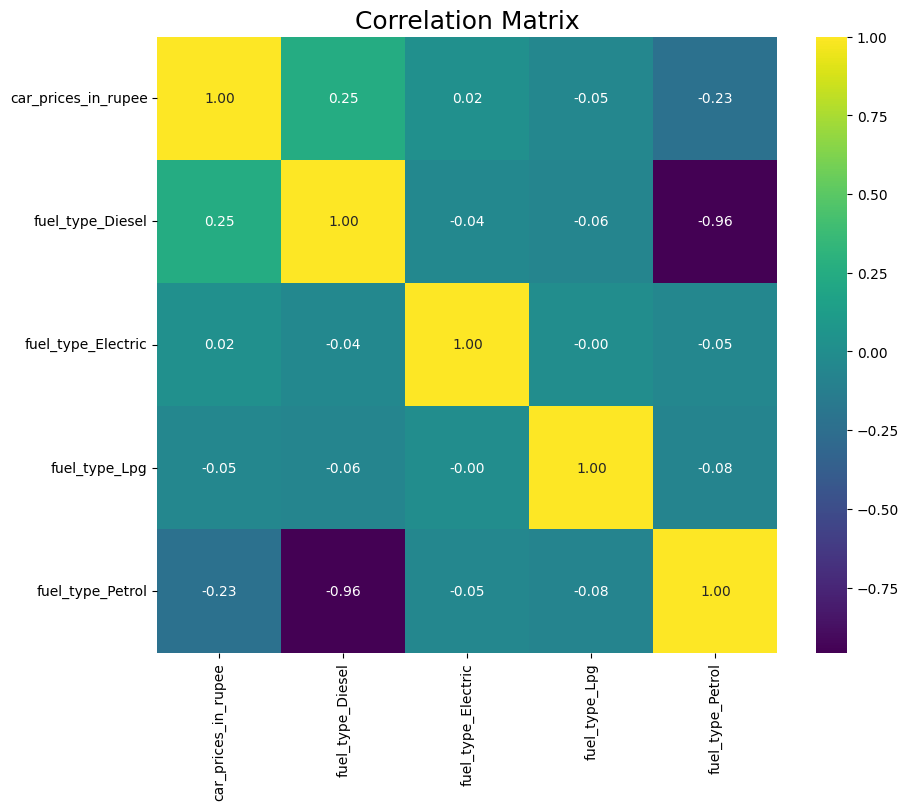

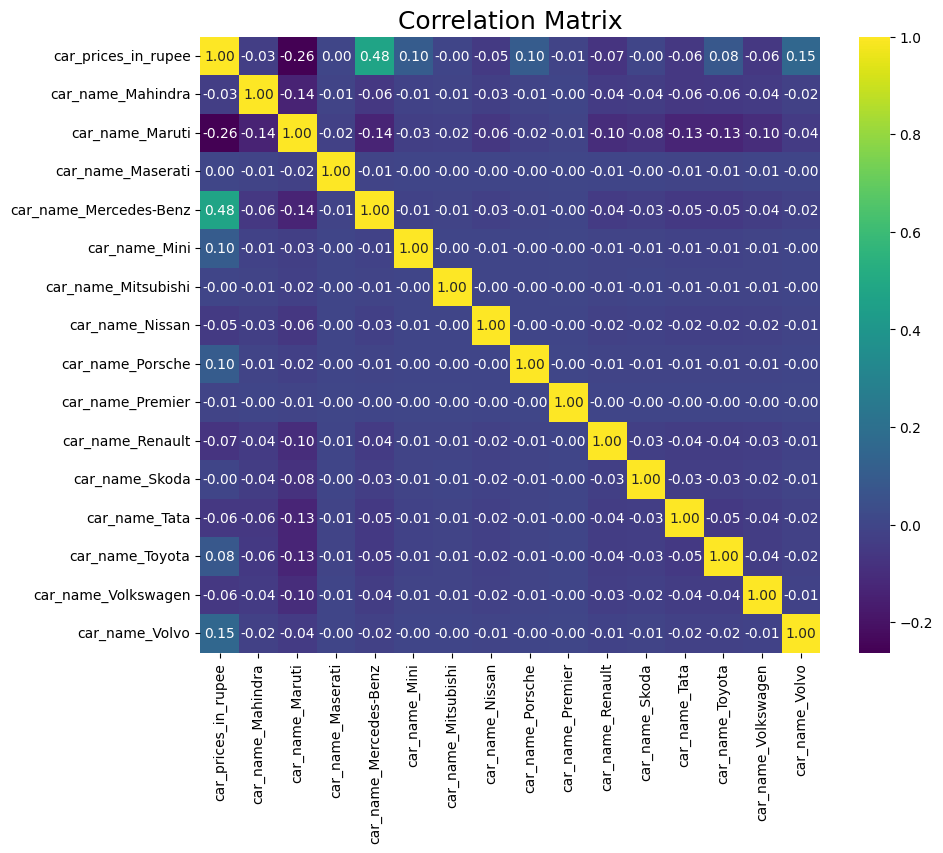

In [20]:
# Example with numerical variable
import used_car_prediction_lib.data_exploration.graphicsExplorer as grpExp

CorrelationMatrix_grpExp = grpExp.CorrelationMatrixGraphicsExplorer()
CorrelationMatrix_grpExp.plot(df, ['car_prices_in_rupee', 'kms_driven','transmission','engine','manufacture','Seats','num_owners'])

# Fuel type
fuel_types_columns = ['car_prices_in_rupee','fuel_type_Diesel', 'fuel_type_Electric','fuel_type_Lpg','fuel_type_Petrol']
CorrelationMatrix_grpExp.plot(df, fuel_types_columns)

#Car Company
first_column = df.columns[0]  # Get the first column name
last_15_columns = df.columns[-15:].tolist()  # Get the last 15 column names
columns_for_heatmap = [first_column] + last_15_columns  # Combine the first column with the last 15 columns
CorrelationMatrix_grpExp.plot(df, columns_for_heatmap)

# Model

In [21]:
print(df.shape)

(5512, 42)


In [22]:
# Splitting into train and test sets

X = df.drop('car_prices_in_rupee', axis = 1) # Selecting independent features 
y = df['car_prices_in_rupee'] # Selecting target variable


X_train, X_test, y_train, y_test =reader.split_df(X, y, test_size=0.3, random_state=123)
print(X_test.shape)

(1654, 41)


In [23]:
import used_car_prediction_lib.model.modelTrainer as modSlc
linearRegression_trMod = modSlc.Linear_Regression_ModelTrainer()
lassoRegression_trMod = modSlc.Lasso_Regression_ModelTrainer(alphas=[0, 1, 2, 3, 4, 5])
ridgeRegression_trMod = modSlc.Ridge_Regression_ModelTrainer(alphas=[0.01, 0.5, 0.75, 1, 2])

'''
linearRegression_trMod.train(X_train, y_train, X_test, y_test)
lassoRegression_trMod.train(X_train, y_train, X_test, y_test)
ridgeRegression_trMod.train(X_train, y_train, X_test, y_test)'''

import used_car_prediction_lib.model.modelCrossValidator as modCV
Lasso_Regression_modCV = modCV.Lasso_Regression_ModelCrossValidator(cv = 10)
Ridge_Regression_modCV = modCV.Ridge_Regression_ModelCrossValidator(cv = 10)
Gradient_Boosting_Regression_modCV = modCV.Gradient_Boosting_Regression_ModelCrossValidator(cv = 10)

'''
Lasso_Regression_modCV.train_validate(X_train, y_train, X_test, y_test)
Ridge_Regression_modCV.train_validate(X_train, y_train, X_test, y_test)
Gradient_Boosting_Regression_modCV.train_validate(X_train, y_train, X_test, y_test)'''

'\nLasso_Regression_modCV.train_validate(X_train, y_train, X_test, y_test)\nRidge_Regression_modCV.train_validate(X_train, y_train, X_test, y_test)\nGradient_Boosting_Regression_modCV.train_validate(X_train, y_train, X_test, y_test)'

# Fine tuning functions


# Running every model

In [24]:
import used_car_prediction_lib.model.modelSelector as modSlc
modelSelector =  modSlc.ModelSelector()

modelSelector.select_best_model(X_train, y_train, X_test, y_test)

Linear Regression MSE: 442497139407.945 and RMSE:442497139407.945  with an R2 of 0.641
Lasso Model with Cross Validation MSE: 442518703006.899 and RMSE:665220.793 with an R2 of 0.641 (alpha=31.257)
Ridge Model with Cross Validation MSE: 442931371433.803 and RMSE:665530.894 with an R2 of 0.641 (alpha=0.521))
This process might take a few minutes.
Fitting 10 folds for each of 32 candidates, totalling 320 fits
Gradient Boosting Model with Cross Validation MSE: 242974188036.161 and RMSE:492924.120 with an R2 of 0.803 (hyperparamaters: {'learning_rate': 0.1, 'max_depth': 6, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 100, 'subsample': 0.8}))
Predictions from the best model 'Gradient Boosting' saved to '../Gradient Boosting_predictions.csv'
The best model is: Gradient Boosting with an MSE of 242974188036.161, RMSE of 492924.120 and an R2 of 0.803


'Gradient Boosting'